In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
%matplotlib inline

In [46]:
#download data from kaggle : https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset
data =pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
print(data.shape)
data.head()

(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [47]:
#dropping unnecessary features
data =data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis =1)

In [48]:
#maping target variable
attribution={'Yes': 1, 'No':0}
data['Attrition'] =data['Attrition'].map(attribution)

In [49]:
#imbalanced data
data.Attrition.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [80]:
print((data.Attrition.value_counts()[0]/len(data))*100,'%')
print((data.Attrition.value_counts()[1]/len(data))*100,'%')

83.87755102040816 %
16.122448979591837 %


In [51]:
attrition = data[data['Attrition'] ==1]
not_attrition =data[data['Attrition']==0][:237]

In [52]:
dataset =pd.concat([attrition, not_attrition])


In [53]:
dataset.Attrition.value_counts()

1    237
0    237
Name: Attrition, dtype: int64

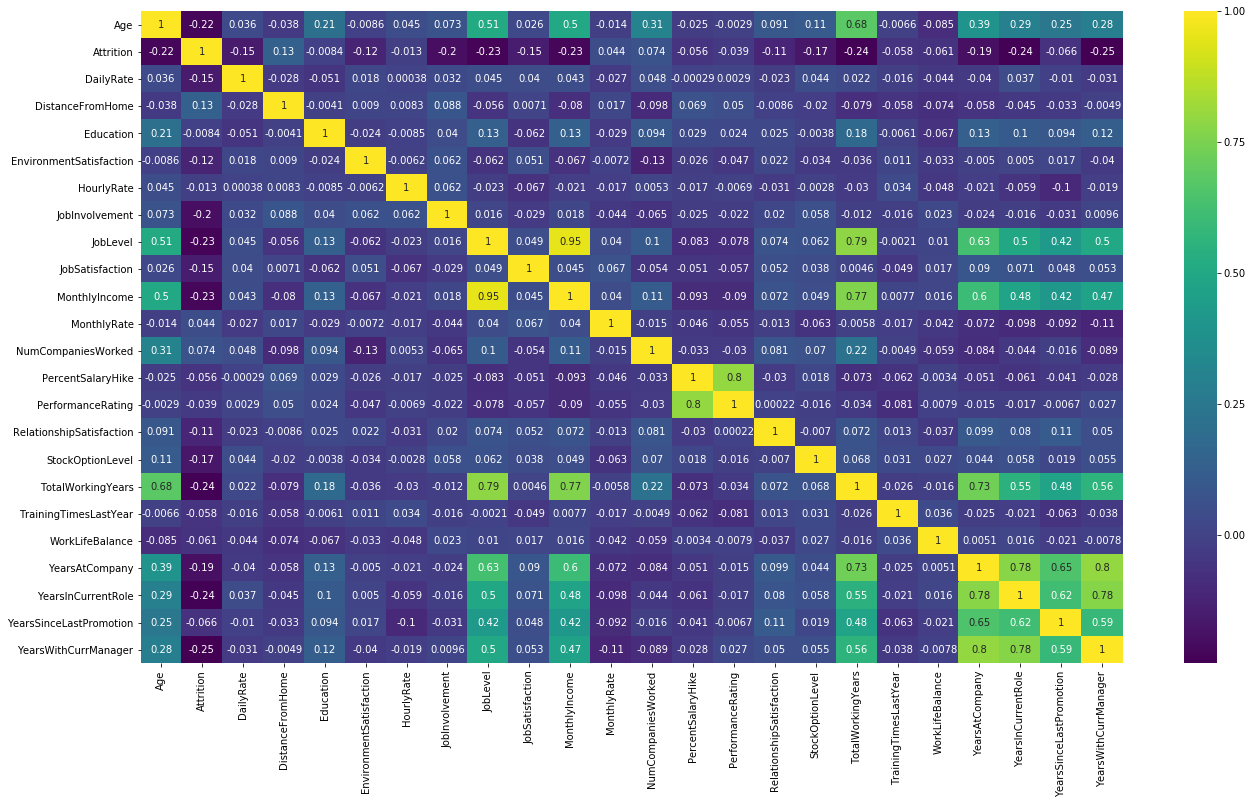

In [54]:
#plotting corolation matrix
plt.figure(figsize=(22,12))
sns.heatmap(dataset.corr(), annot= True, cmap='viridis')

In [55]:
cat =[col for col in dataset.columns if dataset[col].dtype =='O']
cat

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [56]:
num =[col for col in dataset.columns if dataset[col].dtype !='O']


In [57]:
#checking for null values
for col in dataset.columns:
    if dataset[col].isnull().sum() > 0:
        print(col, dataset[col].isnull().sum())

In [58]:
def enconde(var, target):
    order =dataset.groupby(var)[target].mean().to_dict()
    dataset[var]= dataset[var].map(order)

In [59]:
for col in cat:
    enconde(col, 'Attrition')

In [60]:
#split the data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset.drop('Attrition', axis =1), dataset.Attrition, test_size =0.2, random_state =0)
X_train.shape, X_test.shape

((379, 30), (95, 30))

In [61]:
X_train.describe()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,36.042216,0.498727,810.063325,0.497291,9.498681,2.836412,0.499951,2.580475,0.500140,65.828496,2.641161,1.939314,0.490709,2.651715,0.502304,5992.744063,14596.604222,2.810026,0.497862,15.240106,3.168865,2.744063,0.646438,10.295515,2.717678,2.686016,6.437995,3.765172,2.126649,3.796834
std,9.802997,0.080457,416.307586,0.086020,8.237665,1.025930,0.085886,1.101100,0.019493,20.612824,0.758022,1.121701,0.180783,1.126903,0.117867,4695.735456,7003.957253,2.596458,0.155842,3.792624,0.375128,1.120013,0.839852,7.879869,1.299971,0.758786,6.384359,3.734616,3.099719,3.565471
min,18.000000,0.300000,103.000000,0.436066,1.000000,1.000000,0.420000,1.000000,0.475410,30.000000,1.000000,1.000000,0.111111,1.000000,0.336735,1009.000000,2094.000000,0.000000,0.376712,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,0.485981,461.500000,0.436066,2.000000,2.000000,0.420000,2.000000,0.475410,48.000000,2.000000,1.000000,0.333333,2.000000,0.449198,2617.500000,8554.000000,1.000000,0.376712,12.000000,3.000000,2.000000,0.000000,5.000000,2.000000,2.000000,2.000000,1.000000,0.000000,1.000000
50%,34.000000,0.485981,802.000000,0.436066,7.000000,3.000000,0.475936,3.000000,0.515464,66.000000,3.000000,2.000000,0.558824,3.000000,0.449198,4284.000000,14753.000000,2.000000,0.376712,14.000000,3.000000,3.000000,0.000000,9.000000,3.000000,3.000000,5.000000,2.000000,1.000000,3.000000
75%,42.000000,0.485981,1182.500000,0.609272,15.000000,4.000000,0.523810,3.500000,0.515464,84.000000,3.000000,3.000000,0.590476,4.000000,0.634921,7646.500000,20832.000000,4.000000,0.697802,18.000000,3.000000,4.000000,1.000000,14.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,59.000000,0.610619,1496.000000,0.666667,29.000000,5.000000,0.700000,4.000000,0.515464,100.000000,4.000000,5.000000,0.846154,4.000000,0.634921,19999.000000,26999.000000,9.000000,0.697802,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [62]:
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, classification_report


In [68]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(min_child_weight=4)
xgb_model.fit(X_train, y_train)

pred = xgb_model.predict(X_train)
print('train accuracy score :', accuracy_score(y_train, pred))

xgb_pred = xgb_model.predict(X_test)
print('train accuracy score :', accuracy_score(y_test, xgb_pred))

train accuracy score : 0.9683377308707124
train accuracy score : 0.7157894736842105


In [69]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.70      0.71      0.70        45
           1       0.73      0.72      0.73        50

    accuracy                           0.72        95
   macro avg       0.72      0.72      0.72        95
weighted avg       0.72      0.72      0.72        95



In [70]:
#top features( top fators that determine that employee leaving the company)
feature = pd.DataFrame({'feature': X_train.columns,'value' :xgb_model.feature_importances_})

top_features = feature.sort_values(by ='value', ascending =False).iloc[:5]
top_features 

,feature,value
18,OverTime,0.077956
22,StockOptionLevel,0.077251
12,JobRole,0.066730
0,Age,0.059095
26,YearsAtCompany,0.050907


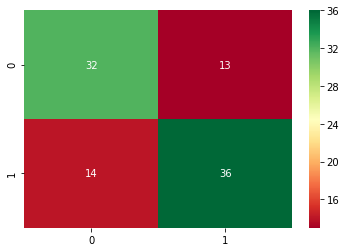

In [71]:
cn = confusion_matrix(y_test, xgb_pred)
sns.heatmap(cn, annot= True, cmap='RdYlGn')

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
   
    plt.figure(figsize=(8, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


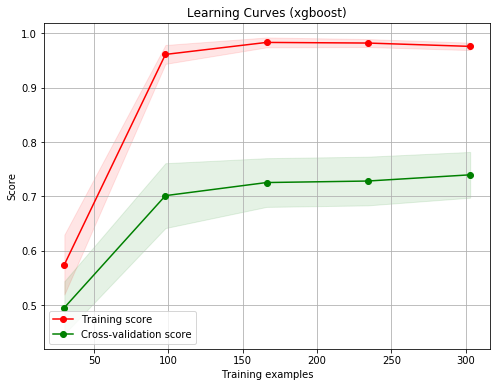

In [73]:
title = "Learning Curves (xgboost)"

# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = xgb_model
plot_learning_curve(estimator, title, X_train, y_train, cv=cv, n_jobs=4)
plt.show()

In [75]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(learning_rate=0.2)
ada_model.fit(X_train, y_train)

pred = ada_model.predict(X_train)
print('train accuracy score :', accuracy_score(y_train, pred))

ada_pred = ada_model.predict(X_test)
print('train accuracy score :', accuracy_score(y_test, xgb_pred))

train accuracy score : 0.8153034300791556
train accuracy score : 0.7157894736842105


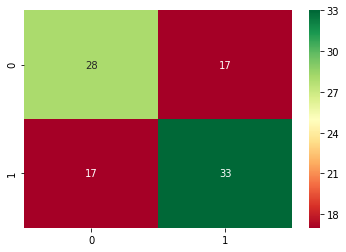

In [76]:
cn = confusion_matrix(y_test, ada_pred)
sns.heatmap(cn, annot= True, cmap='RdYlGn')

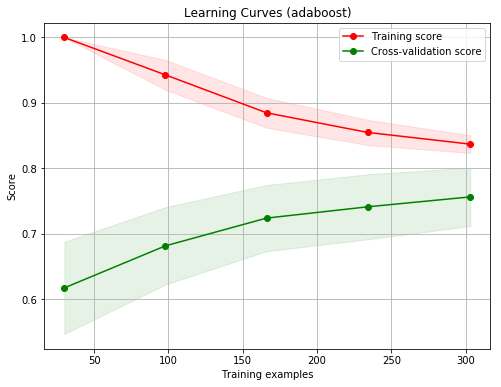

In [77]:
title = "Learning Curves (adaboost)"

# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = ada_model
plot_learning_curve(estimator, title, X_train, y_train, cv=cv, n_jobs=4)
plt.show()